# Phishing Website Detection

- Name : Gaurav Vijay Jadhav
- github : [https://github.com/jadhavgaurav/CodeB_Internship_Project]

# Week 2 Submission

## 1. Business Problem Understanding Document
### **A. Business Problem Summary**
- Phishing is a deceptive practice where attackers trick users into revealing sensitive information by mimicking legitimate websites. These malicious websites often appear genuine but are crafted with the intent of stealing personal data such as login credentials, credit card numbers, and banking details.

- With the rapid growth of internet usage and online services, phishing attacks have become more sophisticated and prevalent. Detecting these websites using traditional methods is no longer sufficient. Thus, leveraging machine learning models to identify phishing websites based on URL and site-level features is a crucial step forward.

- **Scope**
- Analyze URLs and website features to detect phishing attempts.

- Build machine learning models that predict whether a website is legitimate or phishing.

- **Importance**
- Enhances cybersecurity by reducing data breaches.

- Helps individuals and organizations identify and block phishing threats.

- Supports the development of real-time phishing detection tools.



### **B. Key Insights from Literature**
- **Common Traits of Phishing Websites:**
- Use of IP addresses instead of domain names.

- Presence of excessive or suspicious characters (e.g., @, -, //, =, &).

- Long and complex URLs to imitate legitimate sources.

- Use of misleading keywords such as "login", "secure", "bank", etc.

- Hosting on domains with short registration durations.

- **Challenges in Detection:**
- High variability in URL patterns.

- Short lifespan of phishing websites (sometimes a few hours).

- Attackers continuously adapt techniques to bypass detection tools.

- **Potential Solutions:**
- Supervised machine learning models trained on labeled datasets.

- Feature engineering from URL structures and domain metadata.

- Ensemble learning and real-time classification to improve prediction accuracy.

In [65]:
# Import Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [66]:
# import dataset

data_url = 'https://raw.githubusercontent.com/jadhavgaurav/CodeB_Internship_Project/refs/heads/main/dataset_phishing.csv'

df = pd.read_csv(data_url)

df.sample(frac = 1)

url  length_url  \
10710                      http://www.bustybeauties.com/          29   
9535                        https://mymsn0.yolasite.com/          28   
8518                    https://fifohbibou.blogspot.com/          32   
1802   http://encyclopedia2.thefreedictionary.com/Mul...          57   
10706           http://totolive.sportstoto.com.my/stoto/          40   
...                                                  ...         ...   
9192                    https://www.naturalgasworld.com/          32   
3150                              http://www.linea1s.com          22   
2950                            http://www.bdmifund.com/          24   
2840   https://en.wikipedia.org/wiki/The_Bodyguard_(m...          53   
8867   http://support-appleld.com.secureupdate.duilaw...         125   

       length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  \
10710               21   0        2           0      0      0       0      0   
9535                19   0        2           0      0      0       0      0   
8518                23   0        2           0      0      0       0      0   
1802                35   0        2           0      0      0       0      0   
10706               26   0        3           0      0      0       0      0   
...                ...  ..      ...         ...    ...    ...     ...    ...   
9192                23   0        2           0      0      0       0      0   
3150                15   0        2           0      0      0       0      0   
2950                16   0        2           0      0      0       0      0   
2840                16   0        2           0      0      0       0      0   
8867                50   1        4           1      0      1       2      0   

       ...  domain_in_title  domain_with_copyright  whois_registered_domain  \
10710  ...                1                      1                        0   
9535   ...                1                      0                        0   
8518   ...                1                      1                        0   
1802   ...                1                      1                        0   
10706  ...                1                      1                        1   
...    ...              ...                    ...                      ...   
9192   ...                1                      0                        0   
3150   ...                1                      1                        0   
2950   ...                1                      1                        0   
2840   ...                0                      1                        0   
8867   ...                1                      1                        0   

       domain_registration_length  domain_age  web_traffic  dns_record  \
10710                         500        8996      2132314           0   
9535                          258        4489            0           0   
8518                          374        7295            0           0   
1802                         2506        6259          683           0   
10706                           0          -1       332453           0   
...                           ...         ...          ...         ...   
9192                          218        1609       291680           0   
3150                          208         158            0           0   
2950                           79        5034      1372473           0   
2840                          902        7133           12           0   
8867                           25        3992      5697976           0   

       google_index  page_rank      status  
10710             0          2  legitimate  
9535              0          3    phishing  
8518              1          5    phishing  
1802              0          6  legitimate  
10706             0          4  legitimate  
...             ...        ...         ...  
9192              0          5  legitimate  
3150              1          

# 📊 Dataset Exploration Report – Phishing Website Detection

## 📌 Dataset Overview

- **Total Records:** 11,430
- **Total Features (excluding target):** 87
- **Target Variable:** `status`  
  - `0`: Legitimate
  - `1`: Phishing

- **Data Types:**
  - **Numerical (int64/float64):** 87
  - **Categorical/Object:** 1 (`url`)

---

###  Target Column

### `status`
- **Description**: Binary label indicating if the website is phishing (`1`) or legitimate (`0`).
- **Relevance**: This is the variable to be predicted by the classification model.

---

## 🔍 Feature Descriptions & Relevance

Here’s a list of all 87 features, along with their description and importance:

> ℹ️ Note: Many features represent counts, presence (1), or absence (0) of suspicious patterns in the URL or webpage behavior.

| Feature Name                  | Description                                                                 | Relevance to Phishing Detection                                 |
|------------------------------|-----------------------------------------------------------------------------|------------------------------------------------------------------|
| `url`                        | Full URL of the website                                                     | Used for parsing, may be dropped during modeling                |
| `length_url`                 | Total length of the URL                                                     | Longer URLs are often suspicious                                |
| `length_hostname`            | Length of the hostname                                                      | Abnormally long hostnames may indicate phishing                 |
| `ip`                         | If IP address is used instead of domain name (1 = yes)                      | Phishers often use IPs instead of domains                       |
| `nb_dots`                    | Number of dots in the URL                                                   | Too many dots → suspicious subdomains                           |
| `nb_hyphens`                 | Number of hyphens                                                           | Common in phishing URLs to mimic legit domains                  |
| `nb_at`                      | Number of '@' characters                                                    | '@' often used to mask real domain                              |
| `nb_qm`                      | Number of '?' in URL                                                        | Too many parameters can indicate hidden redirection             |
| `nb_and`                     | Number of '&' characters                                                    | Indicates URL manipulation or hidden tracking                   |
| `nb_or`                      | Number of '|' characters                                                    | Rare, may indicate obfuscation                                  |
| `nb_eq`                      | Number of '=' characters                                                    | Common in fake login or redirect pages                          |
| `nb_underscore`              | Count of underscores                                                        | Can signal obfuscation                                          |
| `nb_tilde`                   | Count of '~' characters                                                     | May indicate temporary or unusual pages                         |
| `nb_percent`                 | Count of '%' characters                                                     | Used in encoding redirects or disguising URLs                   |
| `nb_slash`                   | Count of '/' slashes                                                        | Too many = suspicious depth or redirections                     |
| `nb_star`                    | Count of '*' characters                                                     | Very rare in legit URLs                                         |
| `nb_colon`                   | Number of colons ':'                                                        | Used in port specification or data URIs                         |
| `nb_comma`                   | Number of commas                                                            | Rare in legit URLs, may be suspicious                           |
| `nb_semicolumn`              | Number of semicolons                                                        | Used in injected scripts                                        |
| `nb_dollar`                  | Number of '$' characters                                                    | Can indicate obfuscation or script loading                      |
| `nb_space`                   | Number of whitespaces in the URL                                            | Whitespaces in URL are rare and dangerous                       |
| `nb_www`                     | Count of "www" keyword                                                      | Repeated usage may mimic real sites                             |
| `nb_com`                     | Count of ".com" string                                                      | Overuse can fake legitimacy                                     |
| `nb_dslash`                  | Count of '//' used for redirecting                                          | Excess usage indicates abnormal paths                           |
| `http_in_path`               | If "http" is found in the path                                              | Often indicates redirection                                     |
| `https_token`                | If "https" token is used in URL path (1 = yes)                              | Fakes legitimacy                                                |
| `ratio_digits_url`           | Ratio of digits to characters in URL                                        | High ratios = suspicious                                        |
| `ratio_digits_host`          | Ratio of digits in the hostname                                             | Numeric hostnames = uncommon                                    |
| `punycode`                   | Use of punycode encoding (international domains)                            | May mask malicious domain names                                 |
| `port`                       | Use of non-standard port numbers                                            | Suspicious ports ≠ 80 or 443                                    |
| `tld_in_path`                | Top-level domain appearing in path                                          | Can mislead users                                               |
| `tld_in_subdomain`           | TLD used in subdomain                                                       | Trick to appear trustworthy                                     |
| `abnormal_subdomain`         | Abnormal subdomain structure                                                | Eg: login.bank.com.phish.com                                    |
| `nb_subdomains`              | Number of subdomains                                                        | Too many = trickery                                             |
| `prefix_suffix`              | Hyphen in domain (e.g. bank-login.com)                                      | Fake websites mimic real domains                                |
| `random_domain`              | Randomized domain                                                           | Non-meaningful or generated domains                             |
| `shortening_service`         | Use of services like bit.ly                                                 | Used to hide malicious links                                    |
| `path_extension`             | File extension in path (e.g., .exe, .php)                                   | May indicate downloads                                           |
| `nb_redirection`             | Redirection count                                                           | Excessive redirection → phishing                                |
| `nb_external_redirection`    | External redirects                                                          | Leads users to fake sites                                       |
| `length_words_raw`           | Length of raw words in URL                                                  | Obfuscation via random text                                     |
| `char_repeat`                | Repeated characters in path                                                 | Common in fake or auto-gen links                                |
| `shortest_words_raw`         | Shortest word in the URL                                                    | Random short words = suspicious                                 |
| `shortest_word_host`         | Shortest word in hostname                                                   | Useful in domain structure analysis                             |
| `shortest_word_path`         | Shortest word in path                                                       | Detecting disguised segments                                    |
| `longest_words_raw`          | Longest word in the URL                                                     | Fake brand names or gibberish                                   |
| `longest_word_host`          | Longest word in hostname                                                    | Trick to mimic trusted sites                                    |
| `longest_word_path`          | Longest word in path                                                        | Often gibberish or misleading                                   |
| `avg_words_raw`              | Average word length in URL                                                  | Helps in pattern detection                                      |
| `avg_word_host`              | Avg. word length in host                                                    | Similar to above                                                |
| `avg_word_path`              | Avg. word length in path                                                    | Similar to above                                                |
| `phish_hints`                | Count of phishing indicators                                                | Aggregated suspicious signs                                     |
| `domain_in_brand`            | Does domain appear in known brand names?                                    | Fake sites often imitate real brands                            |
| `brand_in_subdomain`         | Brand name used in subdomain                                                | Fakes legitimacy                                                |
| `brand_in_path`              | Brand name used in path                                                     | Can mislead users                                               |
| `suspecious_tld`             | Suspicious top-level domain (e.g. .tk, .ru)                                 | Cheap/free domains used by attackers                            |
| `statistical_report`         | Appears in blacklist/whitelist or reputation DB                            | Reliable signal                                                 |
| `nb_hyperlinks`              | Number of total hyperlinks                                                  | Could include clickbait links                                   |
| `ratio_intHyperlinks`        | Internal hyperlink ratio                                                    | Normal for legit sites                                          |
| `ratio_extHyperlinks`        | External link ratio                                                         | Phish sites link externally more                                |
| `ratio_nullHyperlinks`       | Ratio of null or empty links                                                | Dummy links → suspicious                                        |
| `nb_extCSS`                  | Number of external CSS files                                                | Excess = suspicious                                             |
| `ratio_intRedirection`       | Internal redirection ratio                                                  | Phishers often redirect from own page                           |
| `ratio_extRedirection`       | External redirect ratio                                                     | Leads user out quickly                                          |
| `ratio_intErrors`            | Ratio of internal link errors                                               | Bad design = sign of phishing                                   |
| `ratio_extErrors`            | External errors                                                             | External failures = trap                                        |
| `login_form`                 | Presence of login form                                                      | Major phishing element                                          |
| `external_favicon`           | External favicon used                                                       | Stolen favicons mimic legit sites                               |
| `links_in_tags`              | Links in script/style tags                                                  | Trick users via invisible links                                 |
| `submit_email`               | Uses email submission in forms                                              | Unsecure credential theft                                       |
| `ratio_intMedia`             | Ratio of internal media (images, videos)                                    | High = legit                                                    |
| `ratio_extMedia`             | External media ratio                                                        | External media = phishing risk                                  |
| `sfh`                        | Server form handler                                                         | Blank/unknown handler = suspicious                              |
| `iframe`                     | Uses iframe tag                                                             | Can hide real content                                           |
| `popup_window`               | Popup behavior                                                              | Fake prompts to enter info                                      |
| `safe_anchor`                | Safe anchors (linked to real content)                                       | Legit sites have higher safe anchor count                       |
| `onmouseover`               | Mouseover scripts                                                           | Trick users via hover effects                                   |
| `right_clic`                | Disabling right-click                                                       | Prevents inspection/alerts                                      |
| `empty_title`               | No page title                                                               | Often overlooked by attackers                                   |
| `domain_in_title`           | Domain appears in title                                                     | Good indicator for legit sites                                  |
| `domain_with_copyright`     | Shows copyright                                                             | Adds trust layer                                                |
| `whois_registered_domain`   | Domain is registered                                                        | Whois info missing = suspicious                                 |
| `domain_registration_length`| Length of domain registration                                               | Long-term = safe, Short = suspicious                            |
| `domain_age`                | Age of domain                                                               | New = often phishing                                            |
| `web_traffic`               | Alexa/Web rank                                                             | Low traffic = red flag                                          |
| `dns_record`                | DNS record exists                                                          | No DNS = suspicious                                              |
| `google_index`              | Is page indexed by Google?                                                 | Not indexed = red flag                                          |
| `page_rank`                 | PageRank score from search engines                                         | Low = not trusted                                               |

---



In [67]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [68]:
# Replace 'Legitimate' with 0 and 'Phishing' with 1 in the 'status' column
df['status'] = df['status'].map({'legitimate':0, 'phishing':1})

print(df['status'].value_counts())


status
0    5715
1    5715
Name: count, dtype: int64


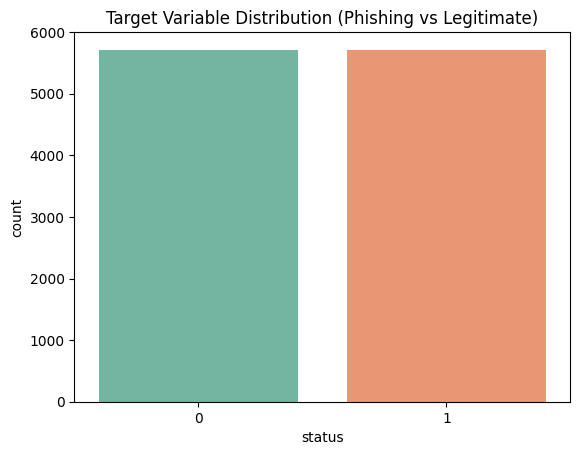

status
0    5715
1    5715
Name: count, dtype: int64


In [83]:
# Basic Info About Target Column and Visualize Target Distribution (Bar Plot)

# Check class distribution

sns.countplot(data=df, x='status', palette='Set2')
plt.title("Target Variable Distribution (Phishing vs Legitimate)")
plt.show()

print(df['status'].value_counts())


In [70]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include='object').columns.tolist()

print("Numeric Features:", numeric_features)
print("Categorical Features:", categorical_features)


Numeric Features: ['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'nb_redirection', 'nb_external_redirection', 'length_words_raw', 'char_repeat', 'shortest_words_raw', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host', 'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_ex

In [71]:
# Univariate Analysis (Custom Function)

from collections import OrderedDict

stats = []
for i in numeric_features:
    numerical_stats = OrderedDict({
        'Feature': i,
        'Maximum' : df[i].max(),
        'Minimum' : df[i].min(),
        'Mean' : df[i].mean(),
        'Median' : df[i].median(),
        '25%': df[i].quantile(0.25),
        '75%': df[i].quantile(0.75),
        'Standard Deviation': df[i].std(),
        'Variance': df[i].var(),
        'Skewness': df[i].skew(),
        'Kurtosis': df[i].kurt(),
        'IQR' : df[i].quantile(0.75) - df[i].quantile(0.25)
    })
    stats.append(numerical_stats)
report = pd.DataFrame(stats)
report

Feature     Maximum  Minimum           Mean  Median   25%  \
0        length_url      1641.0     12.0      61.126684    47.0  33.0   
1   length_hostname       214.0      4.0      21.090289    19.0  15.0   
2                ip         1.0      0.0       0.150569     0.0   0.0   
3           nb_dots        24.0      1.0       2.480752     2.0   2.0   
4        nb_hyphens        43.0      0.0       0.997550     0.0   0.0   
..              ...         ...      ...            ...     ...   ...   
83      web_traffic  10767986.0      0.0  856756.643307  1651.0   0.0   
84       dns_record         1.0      0.0       0.020122     0.0   0.0   
85     google_index         1.0      0.0       0.533946     1.0   0.0   
86        page_rank        10.0      0.0       3.185739     3.0   1.0   
87           status         1.0      0.0       0.500000     0.5   0.0   

         75%  Standard Deviation      Variance  Skewness    Kurtosis       IQR  
0       71.0        5.529732e+01  3.057793e+03  8.085190  144.196391      38.0  
1       24.0        1.077717e+01  1.161474e+02  5.160078   69.829931       9.0  
2        0.0        3.576436e-01  1.279089e-01  1.954418    1.820067       0.0  
3        3.0        1.369686e+00  1.876040e+00  5.718117   66.155843       1.0  
4        1.0        2.087087e+00  4.355931e+00  4.695239   40.696686       1.0  
..       ...                 ...           ...       ...         ...       ...  
83  373845.5        1.995606e+06  3.982443e+12  2.779269    7.306645  373845.5  
84       0.0        1.404254e-01  1.971930e-02  6.835821   44.736280       0.0  
85       1.0        4.988682e-01  2.488695e-01 -0.136115   -1.981820       1.0  
86       5.0        2.536955e+00  6.436143e+00  0.446031   -0.386315       4.0  
87       1.0        5.000219e-01  2.500219e-01  0.000000   -2.000350       1.0  

[88 rows x 12 columns]

In [ ]:
# Check for Missing Values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [73]:
#Check for Duplicate Rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [74]:
# Classify Feature Importance (initial logic-based guess)
for col in df.columns:
    if col != 'status':
        print(f"{col}: {df[col].unique()[:5]} ... ({df[col].nunique()} unique values)")


url: ['http://www.crestonwood.com/router.php'
 'http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4'
 'https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_'
 'http://rgipt.ac.in'
 'http://www.iracing.com/tracks/gateway-motorsports-park/'] ... (11429 unique values)
length_url: [ 37  77 126  18  55] ... (324 unique values)
length_hostname: [19 23 50 11 15] ... (83 unique values)
ip: [0 1] ... (2 unique values)
nb_dots: [3 1 4 2 5] ... (19 unique values)
nb_hyphens: [ 0  1  2 10  3] ... (27 unique values)
nb_at: [0 1 2 3 4] ... (5 unique values)
nb_qm: [0 1 2 3] ... (4 unique values)
nb_and: [0 2 1 9 5] ... (15 unique values)
nb_or: [0] ... (1 unique values)
nb_eq: [ 0  3  1  2 10] ... (16 unique values)
nb_underscore: [0 2 1 4 3] ... (17 unique values)
nb_tilde: [0 1] ... (2 unique values)
nb_percent: [0 1 3 8 6] ... (25 unique values)
nb_slash: [3 5 2 6 4] ... (22 unique values)
nb_star: 

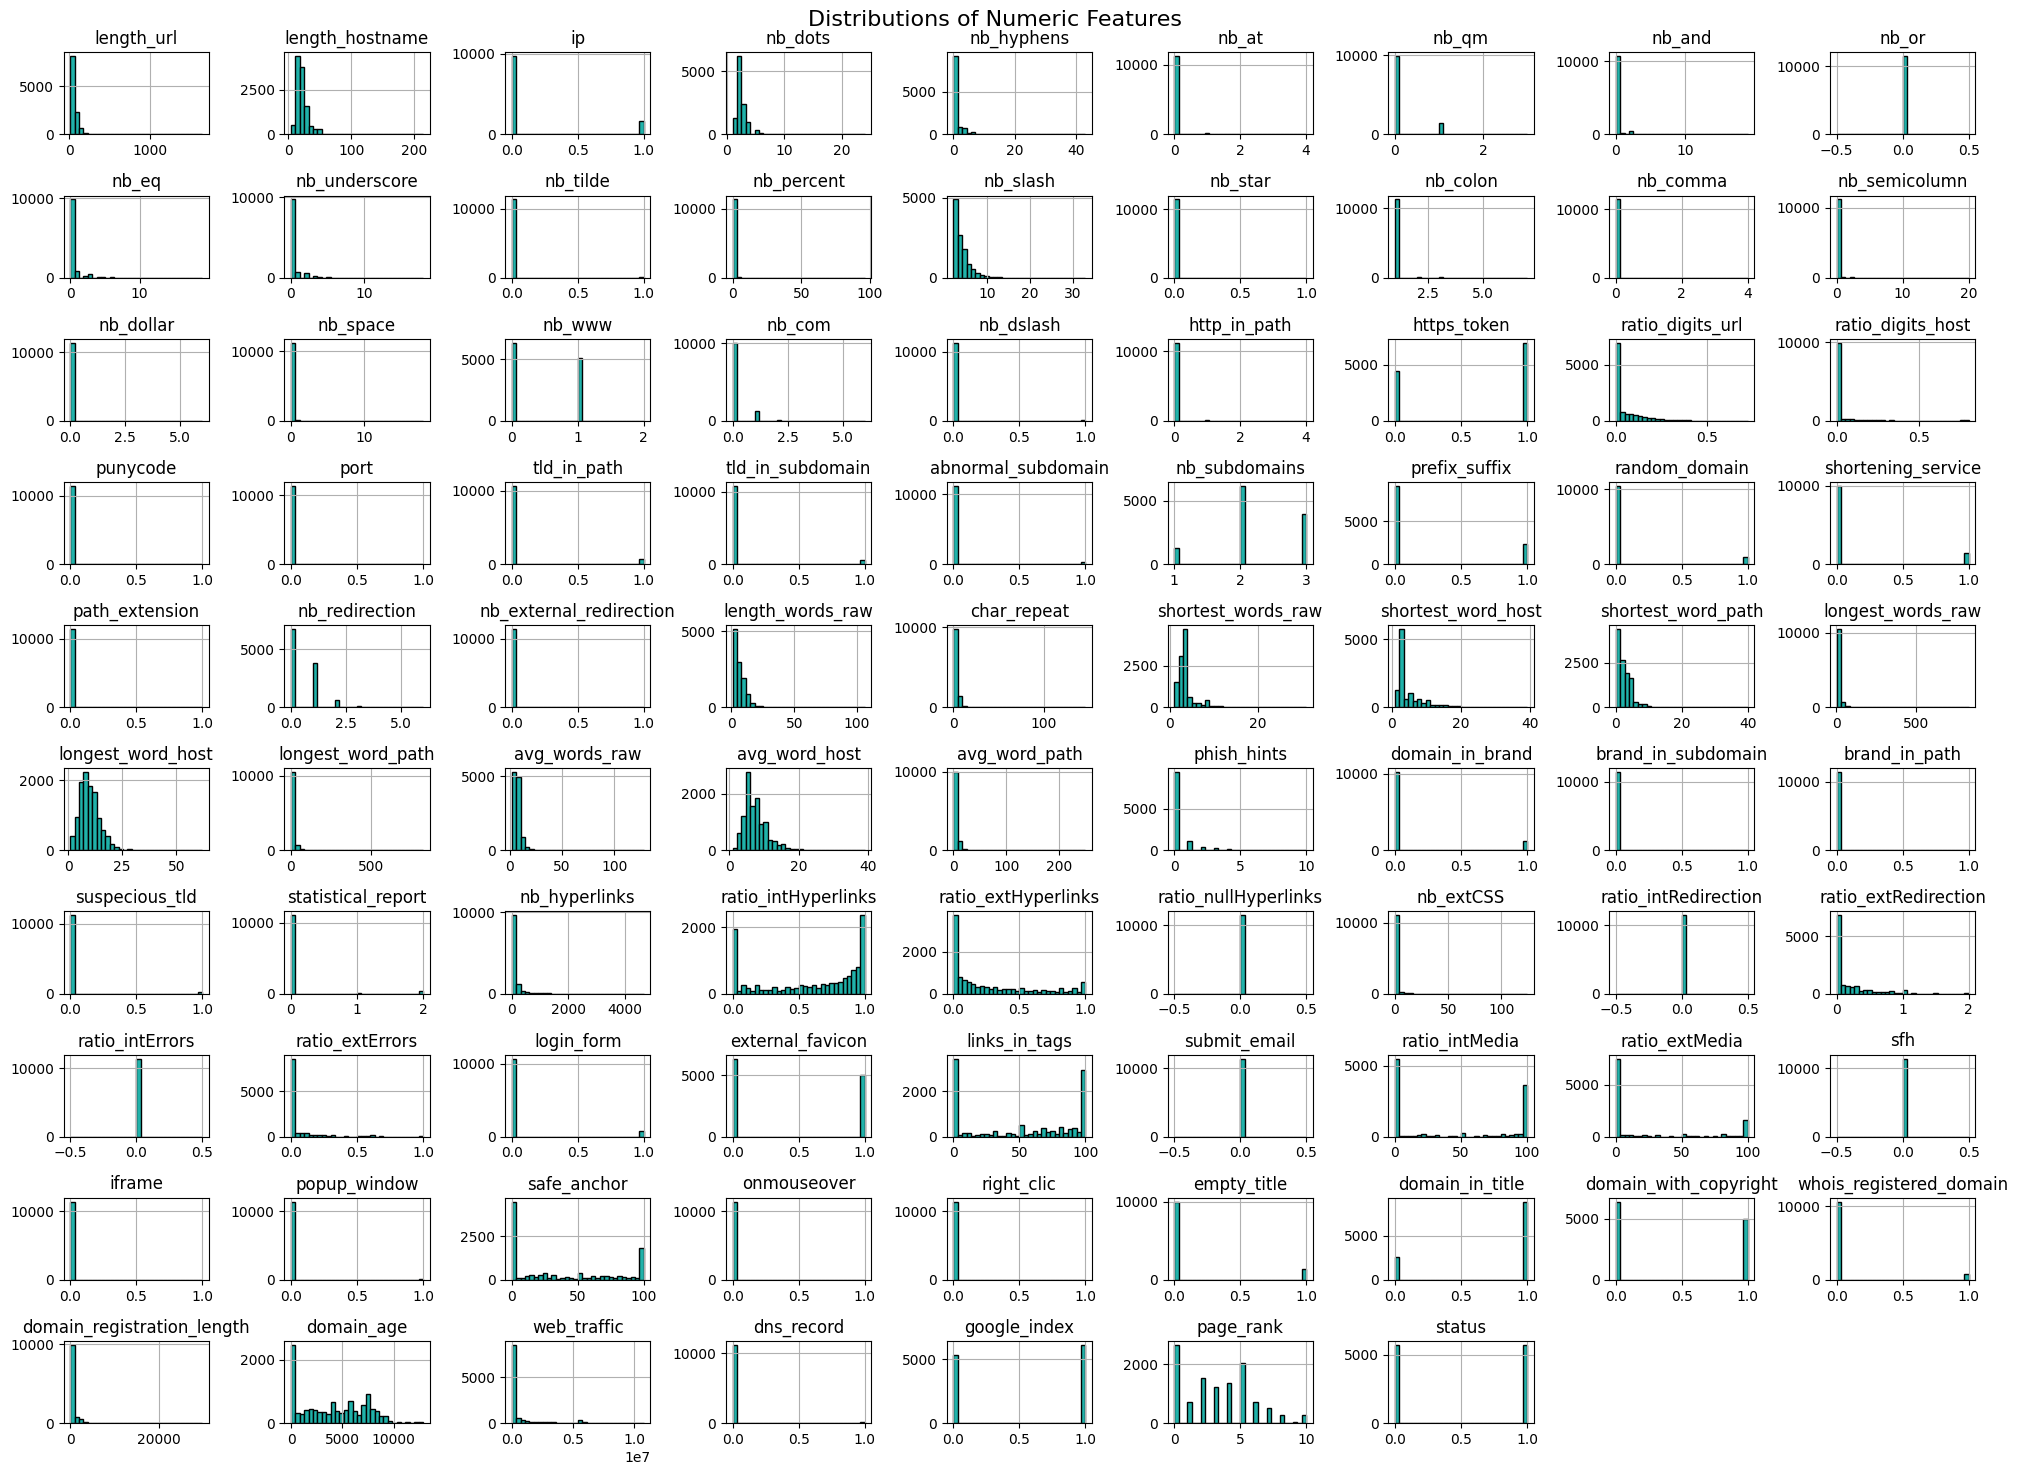

In [75]:
# Visualize Numeric Features Distributions

df[numeric_features].hist(bins=30, figsize=(20, 15), color='lightseagreen', edgecolor='black')
plt.suptitle("Distributions of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


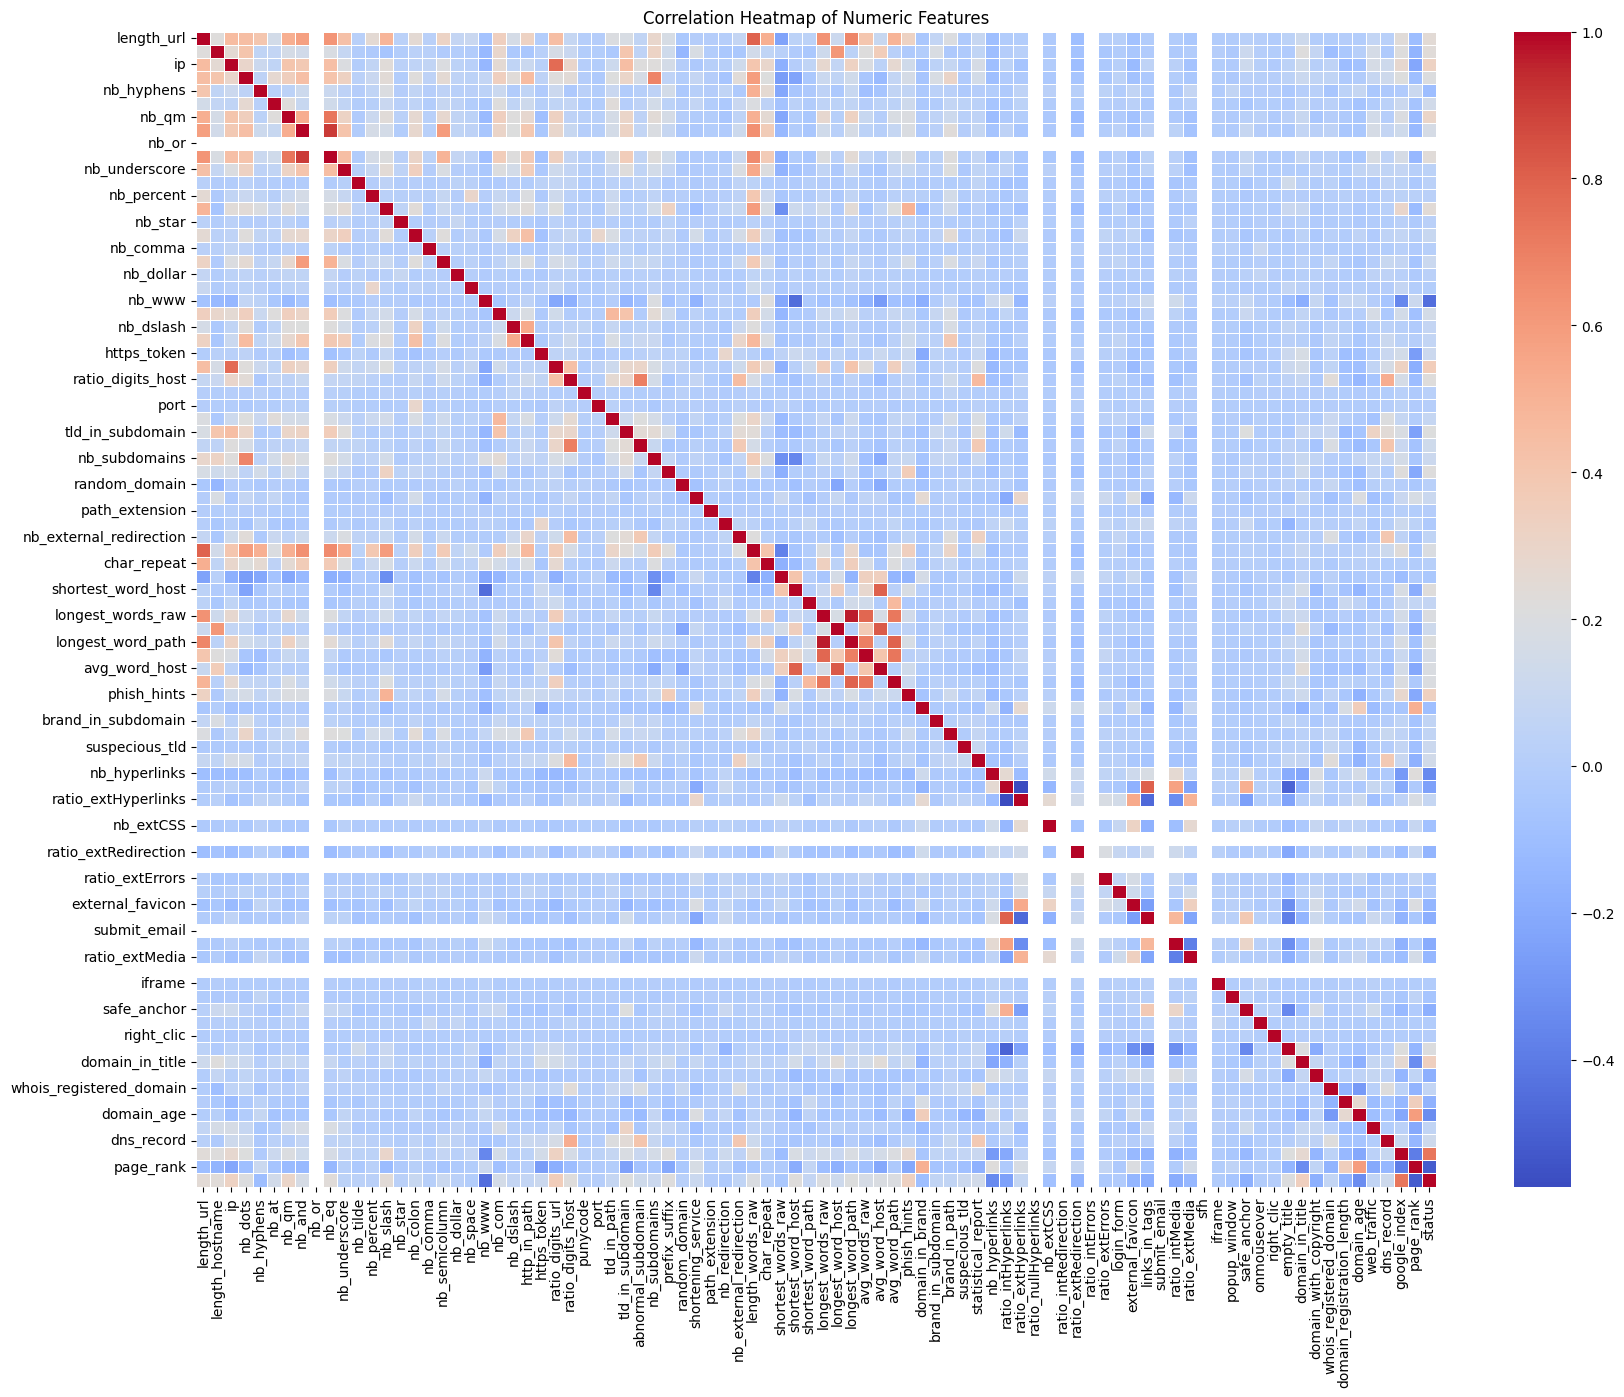

In [77]:
# Correlation Heatmap

plt.figure(figsize=(20, 15))
sns.heatmap(df[numeric_features].corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


 ## Correlation Heatmap (Feature Redundancy & Selection)
**High Correlation Groups (may cause redundancy):**

- longest_words_raw, avg_word_host, shortest_word_host: Highly correlated — consider keeping only one.

- nb_subdomains, tld_in_subdomain, brand_in_subdomain: These also cluster — may contain overlapping information.

- nb_hyperlinks, ratio_extHyperlinks, ratio_extRedirection: Related to link structure — pick wisely.

**Independent but Powerful Features:**

- submit_email, iframe, right_click, phish_hints, https_token, dns_record, domain_age: Appear relatively uncorrelated - — provide unique signals.

**Low or No Correlation with Others:**

- These might offer unique value and should be retained unless proven noisy.

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the number of columns
num_cols = 5
# Calculate the number of rows required
num_rows = (len(numeric_features) - 1) // num_cols + 1  # Ensure enough rows to fit all features

# Create a figure with subplots arranged in the specified grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each numeric feature and plot
for idx, feature in enumerate(numeric_features):
    if feature != 'status':
        sns.boxplot(data=df, x='status', y=feature, palette='coolwarm', ax=axes[idx])
        axes[idx].set_title(f'{feature} vs Status')

# Remove any unused axes if the number of numeric features is not a multiple of 5
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



#  Boxplot Analysis – Key Insights for Phishing Detection

These boxplots compare the distribution of each feature across phishing (`1`) and legitimate (`0`) classes. They provide a clear view of **central tendency**, **spread**, and **outliers**.

---

##  Highly Discriminative Features

These show clear and significant differences between phishing and legitimate classes:

| Feature | Observation |
|--------|-------------|
| `ip` | Phishing URLs frequently use IP addresses instead of domain names. |
| `https_token` | Often present in phishing; used to deceive users with fake security indicators. |
| `submit_email` | Strong phishing indicator; almost exclusive to phishing URLs. |
| `phish_hints` | Typically higher in phishing URLs. |
| `whois_registered_domain` | Legitimate URLs usually have WHOIS info; phishing lacks it. |
| `dns_record` | Missing more often in phishing URLs. |
| `domain_age` | Phishing domains are newer (lower domain age). |
| `domain_registration_length` | Shorter duration typical in phishing domains. |
| `external_favicon` | More common in phishing (linking favicons from outside domains). |
| `ratio_intMedia`, `ratio_extHyperlinks` | Notably different between classes, showing link-based behavioral differences. |

---

##  Moderately Discriminative Features

These display differences that are noticeable but might need further feature engineering:

| Feature | Observation |
|--------|-------------|
| `nb_subdomains` | Phishing URLs often use more subdomains. |
| `ratio_digits_url` | Slightly higher in phishing. |
| `avg_word_host`, `longest_word_host` | Phishing domains have longer and more complex word structures. |
| `port` | Non-zero ports appear more in phishing (e.g., custom ports). |
| `right_click` | Often disabled in phishing. |
| `iframe` | More frequently used in phishing. |
| `safe_anchor` | Slight variation; phishing may use deceptive anchor links. |

---

##  Non-Discriminative / Noisy Features

These features show **minimal variation** across classes and might not contribute much:

- `nb_star`, `nb_dollar`, `nb_or`, `nb_comma` – These characters don’t differ much between phishing and legitimate.
- `domain_with_copyright`, `domain_in_title` – Appear evenly distributed.
- `ratio_redirect`, `path_extension`, `char_repeat` – Less noticeable separation.

---

## 📌 Final Takeaways

-  **Strong Predictors**: `ip`, `https_token`, `submit_email`, `phish_hints`, `dns_record`, `domain_age`
-  **Useful with Preprocessing**: `nb_subdomains`, `ratio_digits_url`, `longest_word_host`, `right_click`
-  **Consider Dropping or Engineering Further**: `nb_star`, `nb_or`, `domain_in_title`, etc.


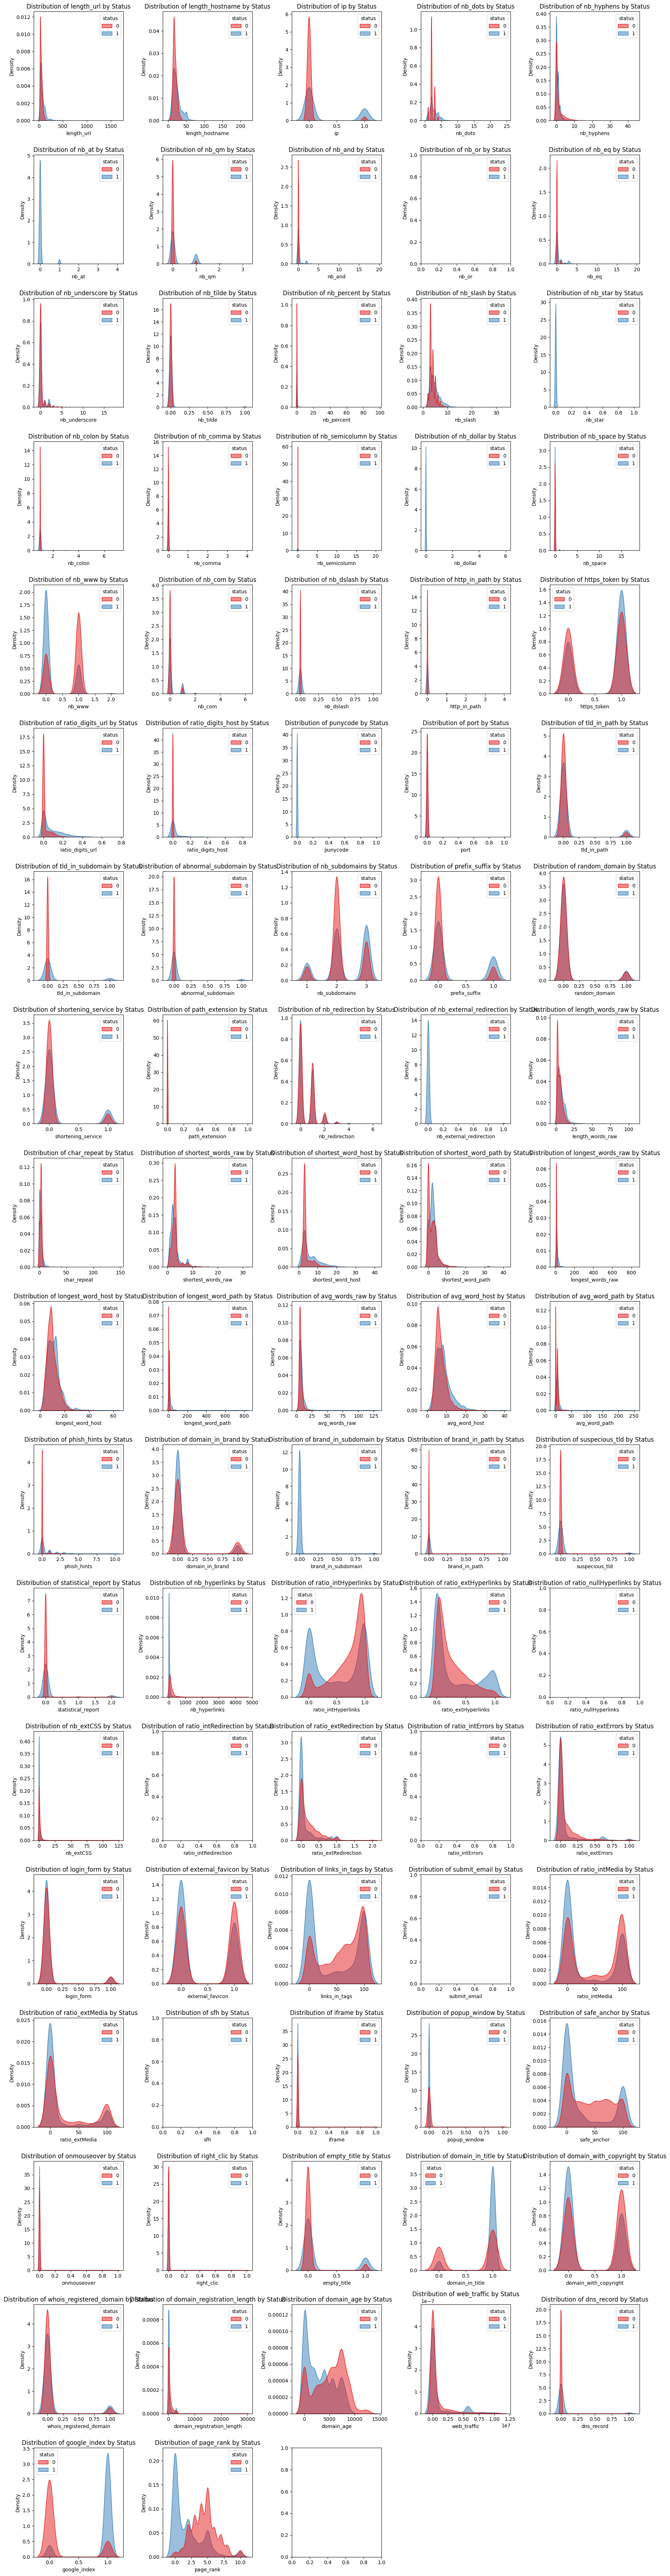

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the number of columns
num_cols = 5
# Calculate the number of rows required
num_rows = (len(numeric_features) - 1) // num_cols + 1  # Ensure enough rows to fit all features

# Create a figure with subplots arranged in the specified grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each numeric feature and plot the KDE
for idx, feature in enumerate(numeric_features):
    if feature != 'status':
        sns.kdeplot(data=df, x=feature, hue='status', fill=True, palette='Set1', alpha=0.5, ax=axes[idx])
        axes[idx].set_title(f'Distribution of {feature} by Status')

# Remove any unused axes if the number of numeric features is not a multiple of 5
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


**These plots show how various features differ between phishing and legitimate URLs.**

**Highly Discriminative Features (good for model training):**
- https_token: Phishing URLs have a significantly higher count of "https" tokens in unexpected parts of the URL.

- phish_hints: Clearly skewed toward phishing; very useful feature.

- submit_email: Almost exclusively found in phishing URLs.

- whois_registered_domain / dns_record / domain_age: Phishing URLs often lack WHOIS records, DNS records, or are newly registered.

- port / ip: Phishing URLs are more likely to use raw IPs and unusual ports.

- external_favicon: Phishing sites often use favicons hosted on external domains.

**Somewhat Useful Features:**
- nb_hyphens, nb_dots, length_url, nb_subdomains: Tend to be higher in phishing URLs.

- right_click: Often disabled in phishing sites to avoid copying or inspecting.

- iframe / safe_anchor: These tags are more often misused in phishing.

- domain_in_title: Often absent in phishing URLs.

- path_extension, random_domain, brand_in_subdomain: More frequently manipulated in phishing attempts.

**Less Differentiated Features (less useful for models):**
- Features like nb_star, nb_dollar, nb_or, nb_comma, etc., show little or no difference between phishing and legitimate URLs.



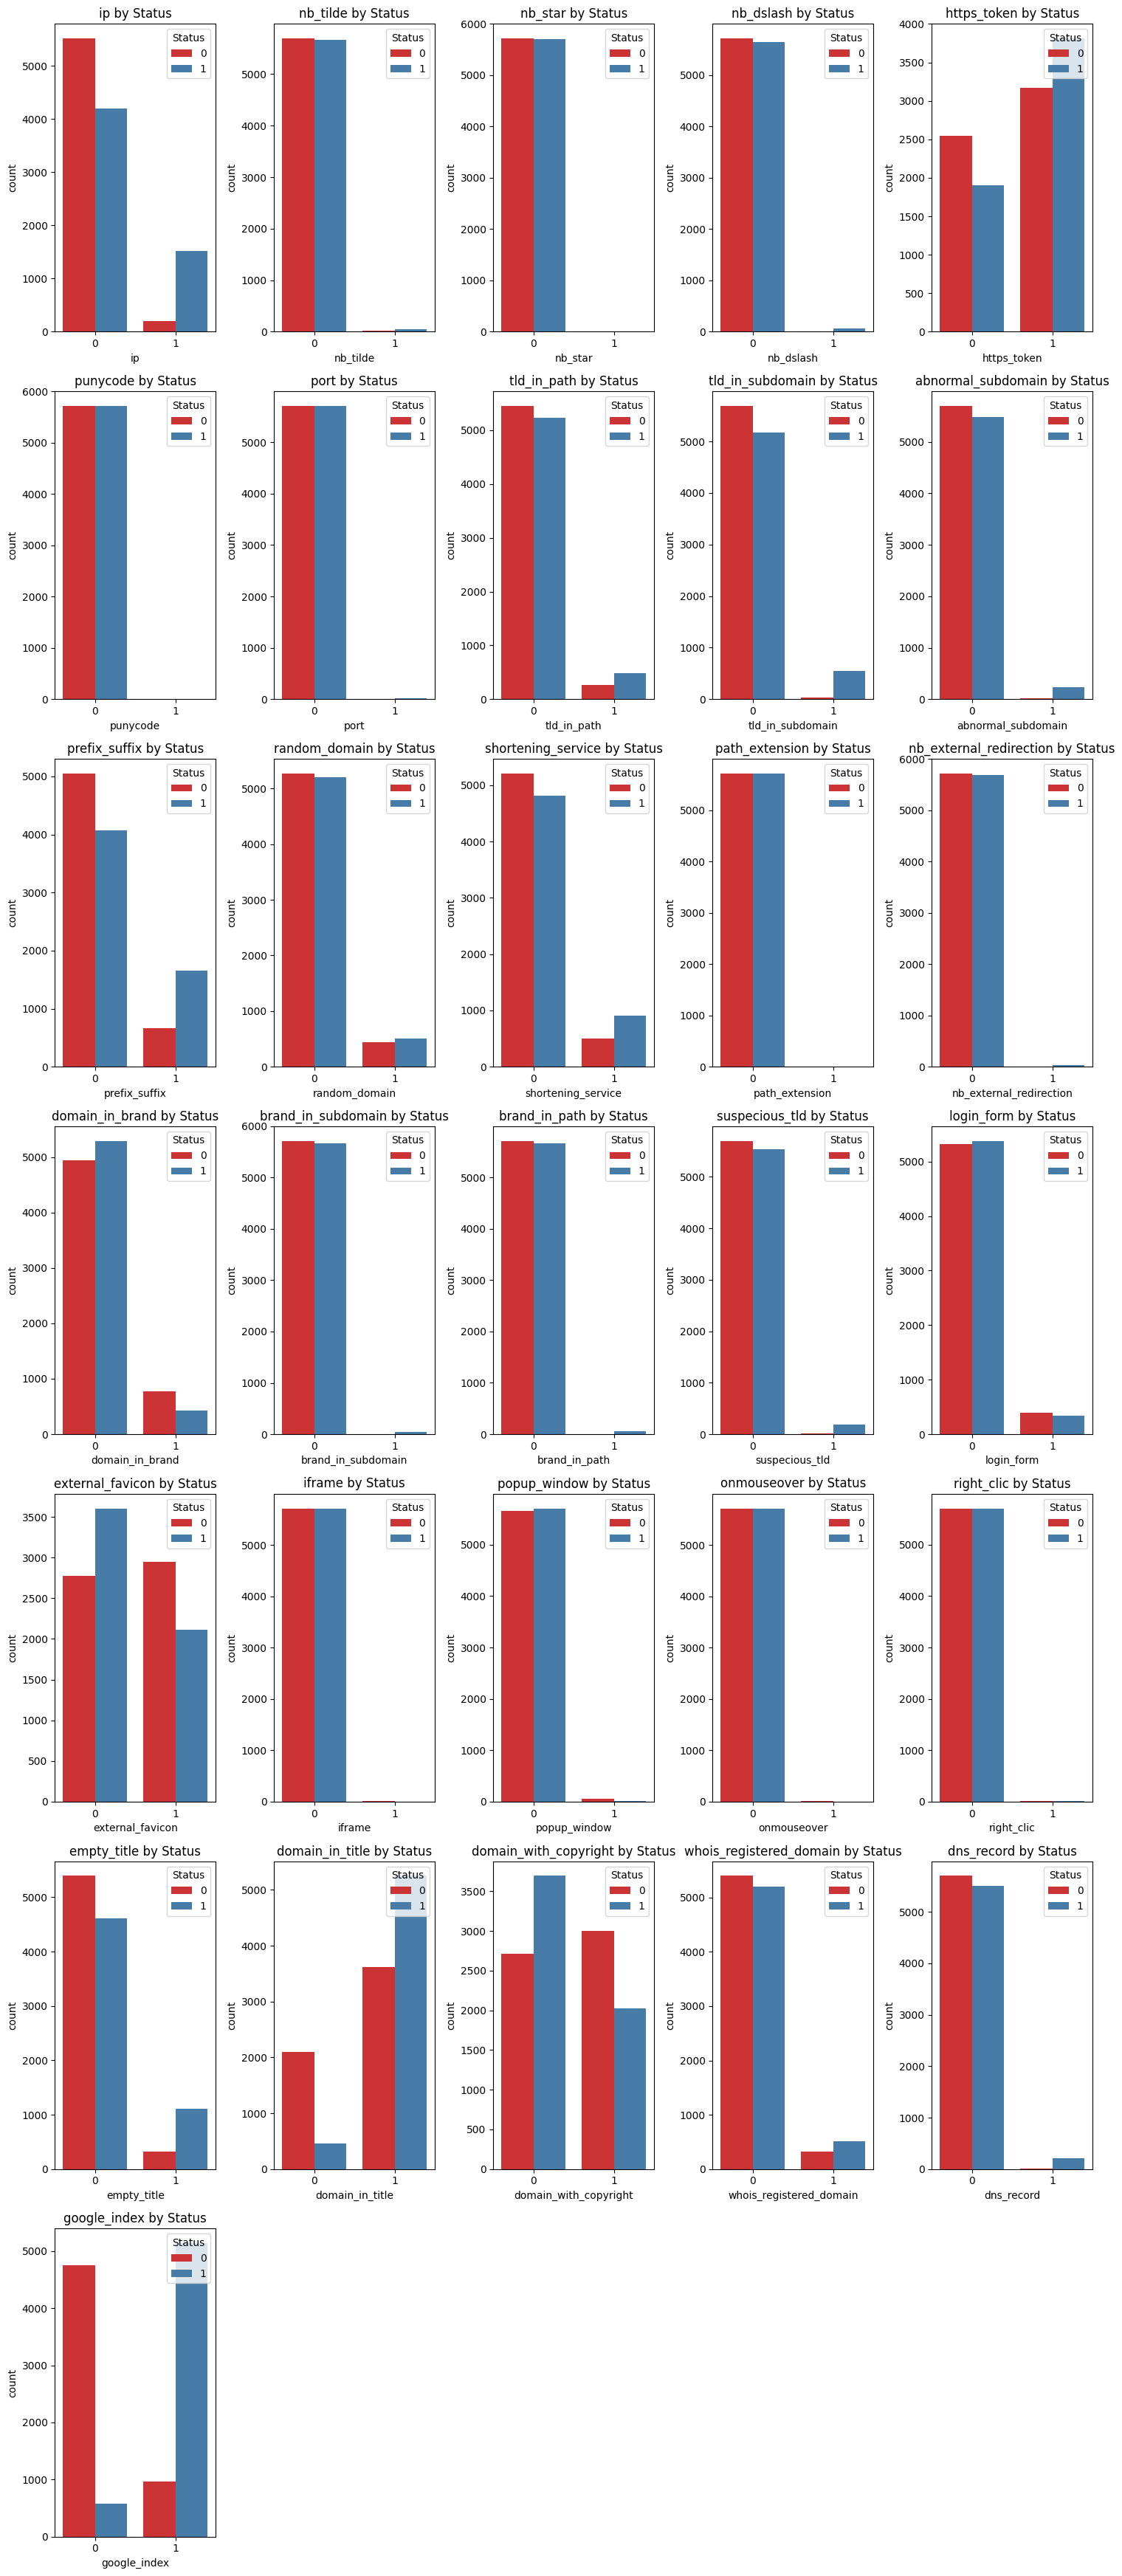

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify binary features (with 2 unique values)
binary_features = [col for col in df.columns if df[col].nunique() == 2 and col != 'status']

# Define the number of columns for the subplot grid
num_cols = 5
num_rows = (len(binary_features) + num_cols - 1) // num_cols  # Calculate rows based on number of binary features

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array to make indexing easier

# Loop through the binary features and plot them in the grid
for i, feature in enumerate(binary_features):
    sns.countplot(data=df, x=feature, hue='status', palette='Set1', ax=axes[i])
    axes[i].set_title(f'{feature} by Status')
    axes[i].legend(title='Status', loc='upper right')

# Turn off axes for unused subplots
for i in range(len(binary_features), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()
